---

<center><h2>Cargar librerias</h2></center>

---

In [1]:
#!pip install scikit-image==0.19.3

from io import BytesIO

import zipfile as zf
import skimage
import pandas as pd

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans

import requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


---

<center><h2>Leer imagenes del zip</h2></center>

---

In [21]:
  url_train = "https://gitlab.com/villainnumber1/filesml_proyecto_3/-/raw/f09ba3971ffbcc2ed6bc853fc93e10f8ea9e75cf/train.zip?inline=false"
  url_test  = "https://gitlab.com/villainnumber1/filesml_proyecto_3/-/raw/f09ba3971ffbcc2ed6bc853fc93e10f8ea9e75cf/test.zip?inline=false"


def read_files(url):
    r = requests.get(url, stream=True)
    file = zf.ZipFile(BytesIO(r.content))

    #file = zf.ZipFile(z)
    imgs = []
    
    for fileinfo in file.filelist:
        imgs.append(file.open(fileinfo.filename))
    
    # Ordenar numericamente
    imgs = sorted(imgs, key=lambda f: int(f.name[:-4]))
    
    return imgs

def to_imgs(imgs):
    return [skimage.io.imread(x) for x in imgs]

X_files = read_files(url_train)
Y_files = read_files(url_test)

# Cluster al que corresponde cada carta en test.zip
y_clusters_text = str( requests.get("https://gitlab.com/villainnumber1/filesml_proyecto_3/-/raw/main/test_clusters.txt").content.decode("utf-8") )
y_clusters = [ int(x) for x in y_clusters_text.split(", ") ]

X_imgs = to_imgs(X_files)
Y_imgs = to_imgs(Y_files)

---

<center><h2>Preprocesamiento de imagenes</h2></center>

---

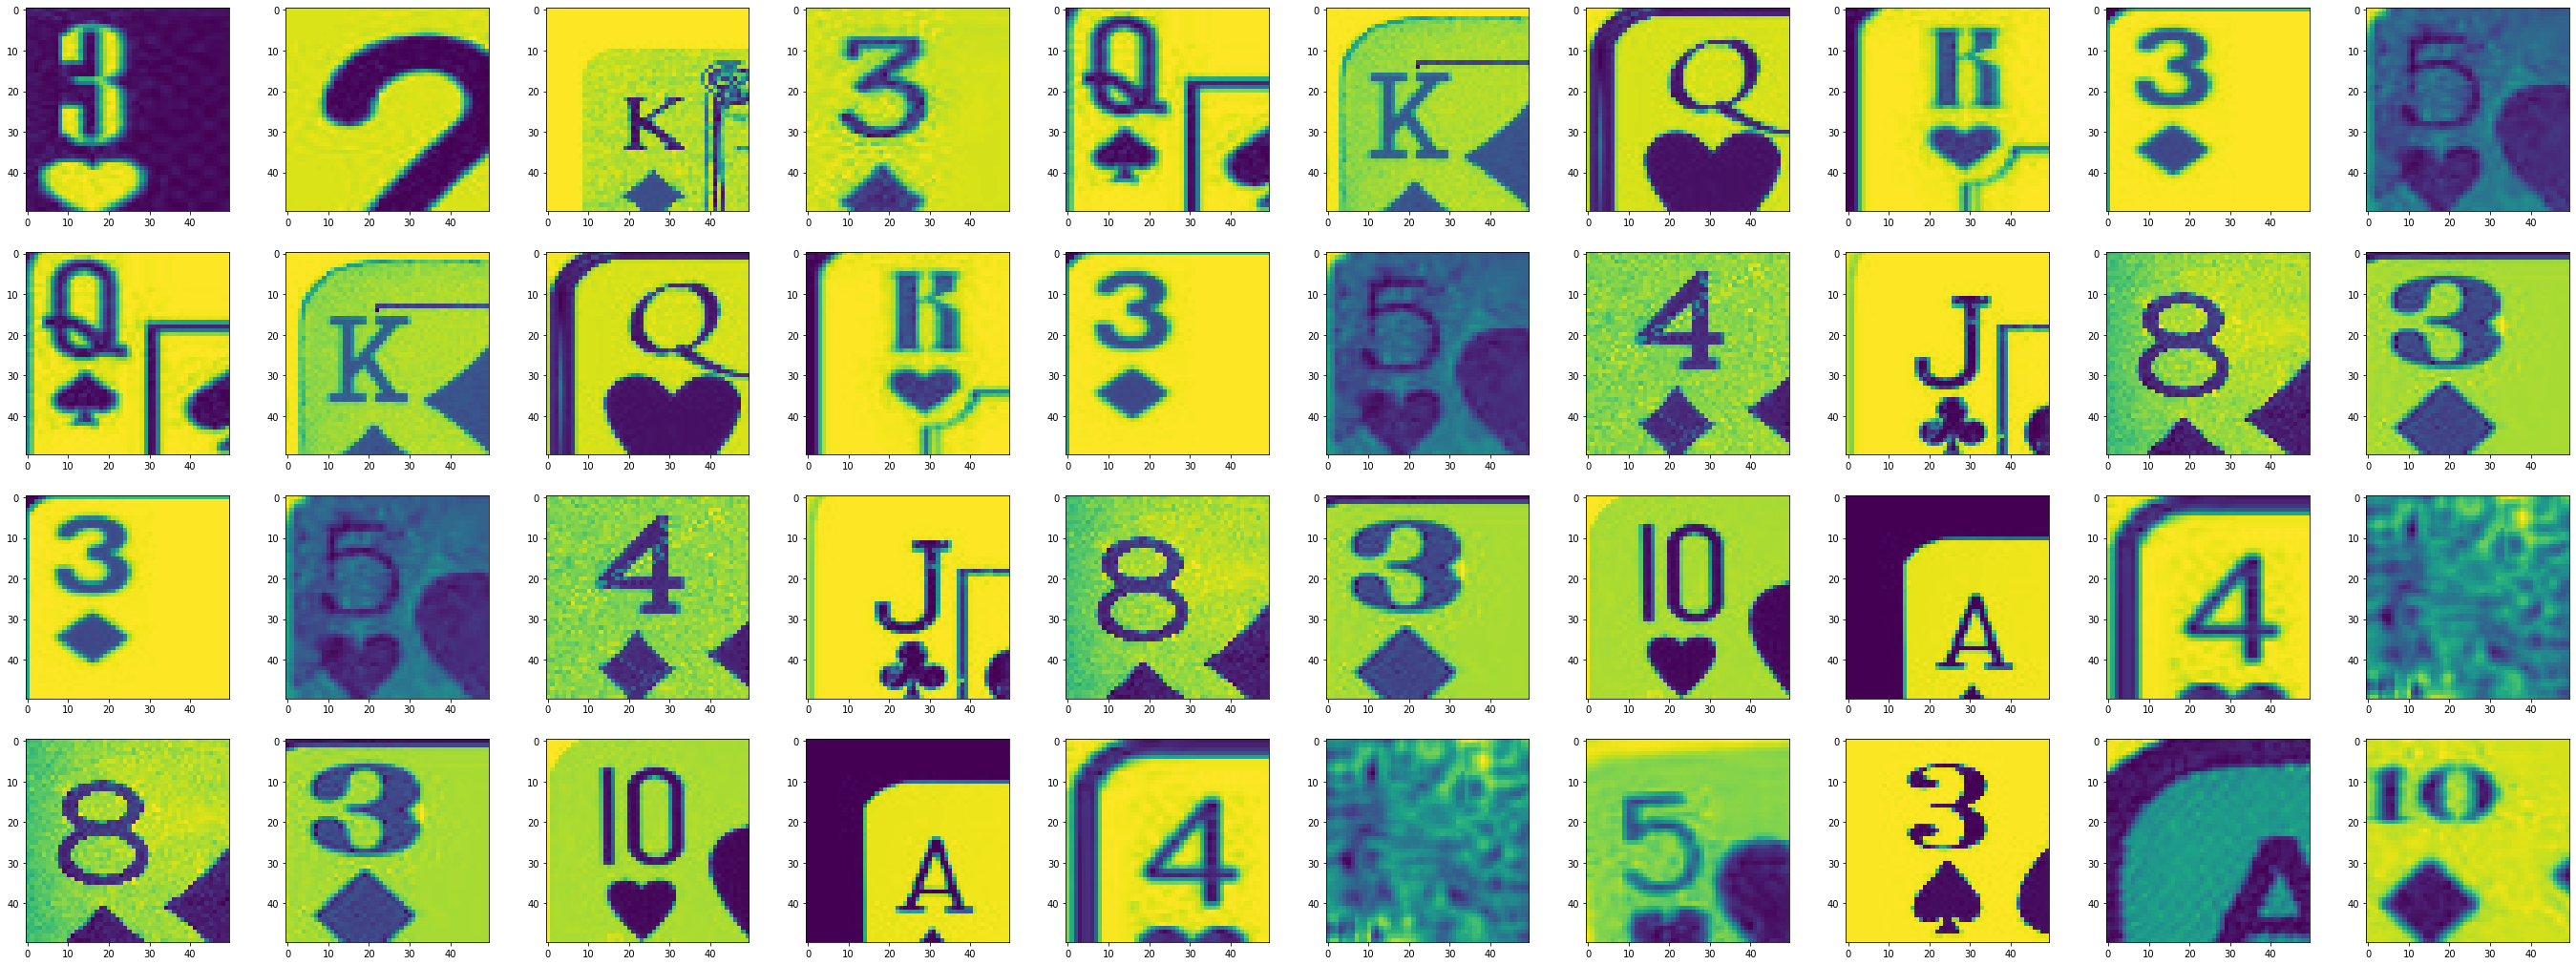

In [122]:
import matplotlib.pyplot as plt

def plot_imgs(imgs, rows, cols):
  fig, axs = plt.subplots(rows, cols, figsize=(rows*12, (rows-1)*6))

  for y in range(rows):
    for x in range(cols):
      axs[y][x].imshow(imgs[rows*y+x])

# Cortar la parte w x h pixeles en la parte superior izquierda de la imagen
def crop_up_left(imgs, h, w):
    return [x[0:h, 0:w] for x in imgs]

def grayscale(imgs):
  return [skimage.color.rgb2gray(x) for x in imgs]

# Dejar solo los primeros 50x50 pixeles arriba a la izquierda
_X = crop_up_left(X_imgs, 50, 50)
#_Y = crop_up_left(Y_imgs, 50, 50)

# Convertir a escala de grises
_X = grayscale(_X)
#_Y = grayscale(_Y)

_X = [skimage.img_as_float(x) for x in _X]

# Mostrar las primeras imagenes
plot_imgs(_X, rows=4, cols=10)
#plot_imgs(_Y, rows=2, cols=10)

---

<center><h2>Entrenar y predecir kmeans</h2></center>

---

In [ ]:
# Convertir en arrays de una dimension
X = [x.flatten() for x in X]
Y = [y.flatten() for y in Y]

In [ ]:
# TODO: cv
# 4 palos más el joker
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

pred = kmeans.predict(Y)
print("ARI:", adjusted_rand_score(pred, y_clusters))

ARI: 0.002461841609287445


---

<center><h2>CSV</h2></center>

---

In [ ]:
ids = [y.name[:-4] for y in Y_files]

solucion = pd.DataFrame(data = { "id" : ids, "suit": pred })
solucion.to_csv("solucion.csv", index=False)

In [ ]:
solucion

,id,suit
0,37,2
1,65,0
2,91,2
3,106,3
4,130,0
...,...,...
260,7932,2
261,7935,2
262,8085,2
263,8102,0
